# Text Summarizer

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
# pip install gensim

In [4]:
# pip install spacy

# Data Preprocessing

In [5]:
# # Reading files

# import os

# location = r"C:\Users\DELL\Documents\Python\Projects\Text Summarization\stories"
# os.chdir(location)

# def readFiles(fileLocation):
#     with open(fileLocation, 'r') as file:
#         print(file.read())
    
# for file in os.listdir():
#     if file.endswith('.story'):
#         fileLocation = f"{location}/{file}"
#         text = readFiles(fileLocation)
#         print(text)

In [6]:
# from collections import defaultdict
# from pathlib import Path

# location = r"C:\Users\DELL\Documents\Python\Projects\Text Summarization\stories"
# results = defaultdict(list)
# for file in Path(location).iterdir():
#     with open(file, "r", encoding="utf-8") as file_open:
#         results ["file_name"].append(file.name)
#         results ["text" ].append(file_open.read())
        
#         search_word = "@highlight"
        
#         if(search_word in file.open(encoding='UTF-8').read()):
#             results["summary"].append(file.open(encoding='UTF-8').read().partition(search_word)[2])
            
# dataset = pd.DataFrame(results)

In [7]:
dataset = pd.read_csv('/kaggle/input/dailymailstoriescsv/DailymailStories.csv', nrows= 10000, usecols=[1,2,3])

In [8]:
dataset.head()

,file_name,text,summary
0,000064fee589e5607c1534a69f852d37b4936cca.story,Sky have won the bidding war for the rights to...,sostok \n\nSky has been in fierce competition ...
1,0000800d9058217f6509d7e63ad475e2de0da611.story,By\nRichard Spillett\n\nAn electronic cigarett...,"sostok \n\nKim Taylor, 54, left the device plu..."
2,0000bf554ca24b0c72178403b54c0cca62d9faf8.story,By\nAlex Ward\n\nA city trader who conned mill...,sostok \n\nNicholas Levene must pay the nomina...
3,0000dfd9f52a470b9f29957686c2704b68cd0635.story,"By \nHelen Pow\n\nPUBLISHED:\n\n09:16 EST, 29 ...",sostok \n\nBella Rodriguez-Torres was diagnose...
4,000128cbd36642ced67ac90bd7d4d1dd5e8cf554.story,Japanese officials today said they are\n ready...,sostok \n\nJapanese chief cabinet secretary Yo...


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  10000 non-null  object
 1   text       10000 non-null  object
 2   summary    10000 non-null  object
dtypes: object(3)
memory usage: 234.5+ KB


In [10]:
dataset.describe()

,file_name,text,summary
count,10000,10000,10000
unique,10000,10000,10000
top,000064fee589e5607c1534a69f852d37b4936cca.story,Sky have won the bidding war for the rights to...,sostok \n\nSky has been in fierce competition ...
freq,1,1,1


In [11]:
dataset.iloc[2,1]

"By\nAlex Ward\n\nA city trader who conned millions of pounds from wealthy investors was yesterday ordered to pay back £1.\n\nNicholas Levene, 48, was jailed for 13 years last November after he admitted orchestrating a lucrative Ponzi scheme which raked in £316million.\n\nHe used the money to finance his own lavish lifestyle with private jets, super yachts and round-the-world trips.\n\nMust pay £1: Jailed city trader Nicholas Levene (pictured arriving at court in November last year), who conned wealthy investors out of £316million, was ordered to pay the nominal sum because he is bankrupt\n\nNow, because he is bankrupt, he has been given seven days to pay back a nominal sum of £1.\n\nThe Serious Fraud Office found that Levene had conned £32,352,027 from some of Britain’s most successful businessmen.\n\nBut with interest and lost profits, his clients are believed to be £101,685,406 out of pocket.\n\nIt is unclear how much, if any of \nthis, his victims have recouped. Justine\xa0 Davidge

In [12]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [13]:
import gensim
dataset['cleanText'] = dataset['text'].apply(lambda x: gensim.utils.simple_preprocess(x))

In [14]:
dataset.head()

,file_name,text,summary,cleanText
0,000064fee589e5607c1534a69f852d37b4936cca.story,Sky have won the bidding war for the rights to...,sostok \n\nSky has been in fierce competition ...,"[sky, have, won, the, bidding, war, for, the, ..."
1,0000800d9058217f6509d7e63ad475e2de0da611.story,By\nRichard Spillett\n\nAn electronic cigarett...,"sostok \n\nKim Taylor, 54, left the device plu...","[by, richard, spillett, an, electronic, cigare..."
2,0000bf554ca24b0c72178403b54c0cca62d9faf8.story,By\nAlex Ward\n\nA city trader who conned mill...,sostok \n\nNicholas Levene must pay the nomina...,"[by, alex, ward, city, trader, who, conned, mi..."
3,0000dfd9f52a470b9f29957686c2704b68cd0635.story,"By \nHelen Pow\n\nPUBLISHED:\n\n09:16 EST, 29 ...",sostok \n\nBella Rodriguez-Torres was diagnose...,"[by, helen, pow, published, est, may, updated,..."
4,000128cbd36642ced67ac90bd7d4d1dd5e8cf554.story,Japanese officials today said they are\n ready...,sostok \n\nJapanese chief cabinet secretary Yo...,"[japanese, officials, today, said, they, are, ..."


In [15]:
dataset['cleanSummary'] = dataset['summary'].apply(lambda x: gensim.utils.simple_preprocess(x))

In [16]:
dataset.head()

,file_name,text,summary,cleanText,cleanSummary
0,000064fee589e5607c1534a69f852d37b4936cca.story,Sky have won the bidding war for the rights to...,sostok \n\nSky has been in fierce competition ...,"[sky, have, won, the, bidding, war, for, the, ...","[sostok, sky, has, been, in, fierce, competiti..."
1,0000800d9058217f6509d7e63ad475e2de0da611.story,By\nRichard Spillett\n\nAn electronic cigarett...,"sostok \n\nKim Taylor, 54, left the device plu...","[by, richard, spillett, an, electronic, cigare...","[sostok, kim, taylor, left, the, device, plugg..."
2,0000bf554ca24b0c72178403b54c0cca62d9faf8.story,By\nAlex Ward\n\nA city trader who conned mill...,sostok \n\nNicholas Levene must pay the nomina...,"[by, alex, ward, city, trader, who, conned, mi...","[sostok, nicholas, levene, must, pay, the, nom..."
3,0000dfd9f52a470b9f29957686c2704b68cd0635.story,"By \nHelen Pow\n\nPUBLISHED:\n\n09:16 EST, 29 ...",sostok \n\nBella Rodriguez-Torres was diagnose...,"[by, helen, pow, published, est, may, updated,...","[sostok, bella, rodriguez, torres, was, diagno..."
4,000128cbd36642ced67ac90bd7d4d1dd5e8cf554.story,Japanese officials today said they are\n ready...,sostok \n\nJapanese chief cabinet secretary Yo...,"[japanese, officials, today, said, they, are, ...","[sostok, japanese, chief, cabinet, secretary, ..."


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   file_name     10000 non-null  object
 1   text          10000 non-null  object
 2   summary       10000 non-null  object
 3   cleanText     10000 non-null  object
 4   cleanSummary  10000 non-null  object
dtypes: object(5)
memory usage: 390.8+ KB


In [18]:
dataset.describe()

,file_name,text,summary,cleanText,cleanSummary
count,10000,10000,10000,10000,10000
unique,10000,10000,10000,10000,10000
top,000064fee589e5607c1534a69f852d37b4936cca.story,Sky have won the bidding war for the rights to...,sostok \n\nSky has been in fierce competition ...,"[sky, have, won, the, bidding, war, for, the, ...","[sostok, sky, has, been, in, fierce, competiti..."
freq,1,1,1,1,1


In [19]:
dataset.iloc[0, 4]

['sostok',
 'sky',
 'has',
 'been',
 'in',
 'fierce',
 'competition',
 'with',
 'frank',
 'warren',
 'boxnation',
 'highlight',
 'the',
 'broadcaster',
 'has',
 'won',
 'the',
 'right',
 'to',
 'show',
 'the',
 'bout',
 'highlight',
 'sky',
 'has',
 'set',
 'the',
 'price',
 'for',
 'floyd',
 'mayweather',
 'vs',
 'manny',
 'pacquiao',
 'at',
 'highlight',
 'the',
 'mega',
 'fight',
 'takes',
 'place',
 'at',
 'the',
 'mgm',
 'grand',
 'in',
 'las',
 'vegas',
 'on',
 'may',
 'highlight',
 'read',
 'how',
 'jeff',
 'powell',
 'broke',
 'the',
 'news',
 'of',
 'sky',
 'deal',
 'eostok']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(dataset['cleanText']), np.array(dataset['cleanSummary']), test_size = 0.2, random_state = 123)

In [21]:
X_train

array([list(['kim', 'kourtney', 'and', 'khloe', 'kardashian', 'know', 'fashion', 'this', 'month', 'they', 'launch', 'their', 'first', 'british', 'clothing', 'line', 'for', 'high', 'street', 'stalwart', 'dorothy', 'perkins', 'and', 'to', 'celebrate', 'the', 'sisters', 'have', 'been', 'sharing', 'their', 'style', 'secrets', 'speaking', 'exclusively', 'to', 'femail', 'kim', 'kourtney', 'and', 'khloe', 'explain', 'how', 'they', 'would', 'style', 'their', 'favourite', 'pieces', 'from', 'their', 'eponymous', 'line', 'the', 'kardashian', 'kollection', 'as', 'well', 'as', 'share', 'the', 'style', 'rules', 'they', 'live', 'by', 'and', 'tell', 'us', 'what', 'they', 'love', 'about', 'each', 'others', 'looks', 'sister', 'act', 'kourtney', 'kim', 'and', 'khloe', 'kardashian', 'model', 'clothes', 'from', 'their', 'dorothy', 'perkins', 'line', 'the', 'siblings', 'have', 'created', 'over', 'larger', 'than', 'life', 'pieces', 'for', 'the', 'brand', 'with', 'heavy', 'emphasis', 'on', 'the', 'party', 'se

In [22]:
X_test

array([list(['chinese', 'property', 'developer', 'is', 'under', 'investigation', 'after', 'local', 'residents', 'claimed', 'the', 'firm', 'bullied', 'them', 'out', 'of', 'their', 'homes', 'by', 'telling', 'them', 'that', 'they', 'would', 'be', 'infected', 'with', 'aids', 'if', 'they', 'did', 'not', 'leave', 'authorities', 'in', 'the', 'city', 'of', 'nanyang', 'in', 'central', 'henan', 'province', 'are', 'carrying', 'out', 'the', 'investigation', 'to', 'find', 'out', 'whether', 'the', 'firm', 'hired', 'builders', 'with', 'aids', 'for', 'the', 'purpose', 'of', 'intimidation', 'according', 'to', 'local', 'media', 'reports', 'the', 'aids', 'demolition', 'team', 'threatened', 'local', 'residents', 'with', 'infection', 'aids', 'according', 'to', 'local', 'media', 'there', 'was', 'an', 'aids', 'demolition', 'team', 'of', 'builders', 'carrying', 'out', 'the', 'work', 'and', 'intimidating', 'residents', 'with', 'threats', 'of', 'infection', 'the', 'reports', 'distributed', 'through', 'weibo', '

In [23]:
y_train

array([list(['sostok', 'kim', 'kourtney', 'and', 'khloe', 'have', 'designed', 'line', 'for', 'dorothy', 'perkins', 'highlight', 'the', 'high', 'street', 'kardashian', 'kollection', 'hits', 'stores', 'on', 'november', 'highlight', 'all', 'three', 'sisters', 'will', 'be', 'in', 'london', 'westfield', 'to', 'meet', 'fans', 'on', 'saturday', 'th', 'november', 'eostok']),
       list(['sostok', 'more', 'than', 'miles', 'nearly', 'per', 'cent', 'of', 'the', 'tunnels', 'for', 'the', 'billion', 'crossrail', 'project', 'are', 'now', 'finished', 'highlight', 'the', 'scheme', 'is', 'per', 'cent', 'complete', 'and', 'by', 'high', 'speed', 'trains', 'will', 'be', 'running', 'as', 'far', 'west', 'as', 'reading', 'highlight', 'around', 'million', 'passengers', 'will', 'travel', 'on', 'crossrail', 'each', 'year', 'and', 'platforms', 'will', 'be', 'in', 'length', 'highlight', 'these', 'pictures', 'show', 'the', 'tunnels', 'at', 'crossrail', 'bond', 'street', 'farringdon', 'paddington', 'and', 'liverpoo

In [24]:
y_test

array([list(['sostok', 'authorities', 'are', 'carrying', 'out', 'an', 'investigation', 'into', 'the', 'firm', 'based', 'in', 'china', 'highlight', 'local', 'residents', 'claim', 'firm', 'bullied', 'them', 'out', 'of', 'their', 'homes', 'with', 'aids', 'threat', 'highlight', 'the', 'builders', 'claimed', 'to', 'have', 'aids', 'patients', 'in', 'their', 'ranks', 'to', 'infect', 'residents', 'eostok']),
       list(['sostok', 'warning', 'graphic', 'content', 'highlight', 'hundreds', 'of', 'thousands', 'turned', 'out', 'across', 'egypt', 'for', 'pro', 'army', 'demonstrations', 'highlight', 'they', 'clashed', 'with', 'supporters', 'of', 'ousted', 'president', 'mohammed', 'morsi', 'who', 'also', 'lined', 'the', 'streets', 'highlight', 'morsi', 'has', 'been', 'formally', 'accused', 'of', 'conspiring', 'with', 'palestinian', 'group', 'hamas', 'and', 'of', 'murdering', 'prison', 'officers', 'highlight', 'the', 'fighting', 'is', 'the', 'country', 'bloodiest', 'incidence', 'of', 'violence', 'sinc

In [25]:
max_text_len = 500
max_summary_len = 100

In [26]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings

pd.set_option( "display.max_columns", 500)
warnings.filterwarnings("ignore")

In [29]:
x_tokenizer = Tokenizer()
X_tokenizer = Tokenizer() 
X_train = X_train.flatten()
X_tokenizer.fit_on_texts(X_train)

In [30]:
thresh = 4

cnt = 0

tot_cnt = 0

freq = 0
tot_freq = 0

for key,value in X_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 50.88906214632429
Total Coverage of rare words: 1.1025176148411409


In [31]:
X_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 

X_tokenizer.fit_on_texts(list(X_train))

X_train_seq = X_tokenizer.texts_to_sequences(X_train) 
X_test_seq = X_tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(X_train_seq,  maxlen = max_text_len, padding = 'post')
X_test = pad_sequences(X_test_seq, maxlen = max_text_len, padding = 'post')

X_voc = X_tokenizer.num_words + 1

In [32]:
X_voc 

39055

In [33]:
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_train))

In [34]:

thresh = 6

cnt = 0
tot_cnt = 0
freq = 0
tot_freq = 0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt = tot_cnt+1
    tot_freq = tot_freq+value
    if(value<thresh):
        cnt = cnt+1
        freq = freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 76.64465967358154
Total Coverage of rare words: 9.527145843368356


In [35]:
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt)

y_tokenizer.fit_on_texts(list(y_train))

y_train_seq = y_tokenizer.texts_to_sequences(y_train) 
y_test_seq = y_tokenizer.texts_to_sequences(y_test) 

y_train = pad_sequences(y_train_seq, maxlen=max_summary_len, padding='post')
y_test = pad_sequences(y_test_seq, maxlen=max_summary_len, padding='post')

y_voc = y_tokenizer.num_words +1

In [36]:
y_voc

6970

In [37]:
ind=[]
for i in range(len(y_train)):
    cnt=0
    for j in y_train[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_train=np.delete(y_train,ind, axis=0)
X_train=np.delete(X_train,ind, axis=0)

In [38]:
ind=[]
for i in range(len(y_test)):
    cnt=0
    for j in y_test[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_test=np.delete(y_test,ind, axis=0)
X_test=np.delete(X_test,ind, axis=0)

In [39]:
import os
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K


class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs, verbose=False):
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            # <= batch_size*en_seq_len, latent_dim
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            
            # <= batch_size*en_seq_len, latent_dim
            W_a_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W_a), (-1, en_seq_len, en_hidden))
            
            if verbose:
                print('wa.s>',W_a_dot_s.shape)

            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>',U_a_dot_h.shape)

            # <= batch_size*en_seq_len, latent_dim
            reshaped_Ws_plus_Uh = K.tanh(K.reshape(W_a_dot_s + U_a_dot_h, (-1, en_hidden)))
            
            if verbose:
                print('Ws+Uh>', reshaped_Ws_plus_Uh.shape)

            # <= batch_size, en_seq_len
            e_i = K.reshape(K.dot(reshaped_Ws_plus_Uh, self.V_a), (-1, en_seq_len))
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            
            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        def create_inital_state(inputs, hidden_size):
            fake_state = K.zeros_like(inputs)
            fake_state = K.sum(fake_state, axis=[1, 2])
            fake_state = K.expand_dims(fake_state)
            fake_state = K.tile(fake_state, [1, hidden_size])
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])
        
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [40]:
from tensorflow.keras import backend as K 
import tensorflow
from tensorflow.keras.layers import AdditiveAttention, Attention
K.clear_session()

latent_dim = 256
embedding_dim = 128

encoder_inputs = tensorflow.keras.layers.Input(shape=(max_text_len,))

enc_emb =  Embedding(X_voc, embedding_dim,trainable=True)(encoder_inputs)

encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.2,recurrent_dropout=0.2)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.2,recurrent_dropout=0.2)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

encoder_lstm3= LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.2,recurrent_dropout=0.2)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

decoder_inputs = tensorflow.keras.layers.Input(shape=(None,))

dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])
# attn_layer = Attention(name='attention_layer', use_scale=True)
# attn_out = attn_layer([decoder_outputs, encoder_outputs])

decoder_concat_input = tensorflow.keras.layers.Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

decoder_dense =  tensorflow.keras.layers.TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 500)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 500, 128)     4999040     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 500, 256),   394240      ['embedding[0][0]']              
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                              

In [41]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [42]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [43]:
history = model.fit([X_train,y_train[:,:-1]], y_train.reshape(y_train.shape[0],y_train.shape[1], 1)[:,1:] ,epochs=10,callbacks=[es],batch_size= 64, validation_data=([X_test,y_test[:,:-1]], y_test.reshape(y_test.shape[0],y_test.shape[1], 1)[:,1:]))

Epoch 1/10
125/125 [==============================] - 473s 4s/step - loss: 3.7674 - accuracy: 0.5266 - val_loss: 3.2126 - val_accuracy: 0.5543
Epoch 2/10
125/125 [==============================] - 452s 4s/step - loss: 3.2543 - accuracy: 0.5537 - val_loss: 3.1517 - val_accuracy: 0.5650
Epoch 3/10
125/125 [==============================] - 444s 4s/step - loss: 3.2146 - accuracy: 0.5583 - val_loss: 3.1347 - val_accuracy: 0.5646
Epoch 4/10
125/125 [==============================] - 438s 4s/step - loss: 3.1892 - accuracy: 0.5614 - val_loss: 3.1078 - val_accuracy: 0.5700
Epoch 5/10
125/125 [==============================] - 436s 3s/step - loss: 3.1612 - accuracy: 0.5650 - val_loss: 3.0820 - val_accuracy: 0.5724
Epoch 6/10
125/125 [==============================] - 436s 3s/step - loss: 3.1401 - accuracy: 0.5666 - val_loss: 3.0687 - val_accuracy: 0.5729
Epoch 7/10
125/125 [==============================] - 433s 3s/step - loss: 3.1238 - accuracy: 0.5676 - val_loss: 3.0565 - val_accuracy: 0.5735

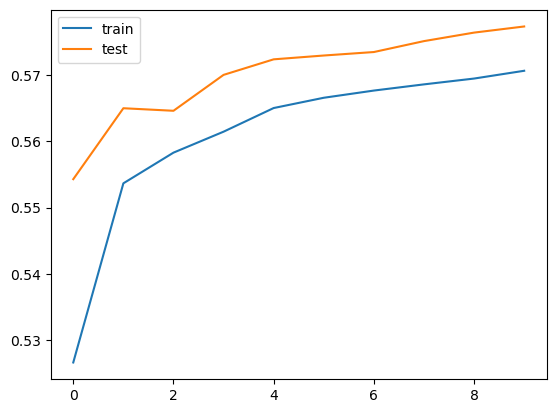

In [44]:
from matplotlib import pyplot
pyplot.plot(history.history['accuracy'], label='train') 
pyplot.plot(history.history['val_accuracy'], label='test') 
pyplot.legend() 
pyplot.show()

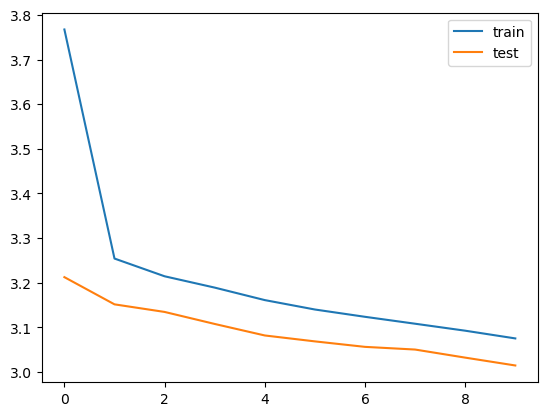

In [45]:
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend() 
pyplot.show()

In [46]:
reverse_target_word_index=y_tokenizer.index_word 
reverse_source_word_index=X_tokenizer.index_word 
from tensorflow.keras.layers import AdditiveAttention, Attention
target_word_index=y_tokenizer.word_index

In [48]:
from tensorflow.keras.layers import Input, Concatenate

encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

dec_emb2= dec_emb_layer(decoder_inputs) 

decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
# attn_out_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])

decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

decoder_outputs2 = decoder_dense(decoder_inf_concat) 

decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [49]:
def decode_sequence(input_seq):
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    target_seq = np.zeros((1,1))
    
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        e_h, e_c = h, c

    return decoded_sentence

In [50]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [51]:
for i in range(0,20):
    print("Review:",seq2text(X_train[i]))
    print("Original summary:",seq2summary(y_train[i]))
    print("Predicted summary:",decode_sequence(X_train[i].reshape(1,max_text_len)))
    print("\n")

Review: hair in sleek ponytail think you should keep accessories to minimum with this look am an girl so would personally go towards basic but fab gold hoop if earrings aren your thing then keep it simple and wear statement ring for day time event where you still need to dress up little pair the dress with great fitting denim jacket and gorgeous black flat sandals black tote would match the outfit perfectly and help keep all your daytime essentials with you what is the one style rule you live by always dress for your body not every trend works for every body type but am strong believer that every woman no matter her size or age can incorporate the current trends of the season in to her look just remember to not lose yourself in finding the right way to wear trend your way trendy doesn mean you can put your own personal signature on it know the ones that work for you and always accentuate your assets are your looks very different what do you like about each others style think kim and ha

In [ ]:
from nltk.translate.bleu_score import sentence_bleu
for i in range(0,1000):
  reference = seq2summary(y_train[i])
  candidate = decode_sequence(X_train[i].reshape(1, max_text_len))

print('Individual 1-gram: %f' % sentence_bleu(reference, candidate, weights=(1, 0, 0, 0)))
print('Individual 2-gram: %f' % sentence_bleu(reference, candidate, weights=(0, 1, 0, 0)))
print('Individual 3-gram: %f' % sentence_bleu(reference, candidate, weights=(0, 0, 1, 0)))
print('Individual 4-gram: %f' % sentence_bleu(reference, candidate, weights=(0, 0, 0, 1)))

1/1 [==============================] - 0s 23ms/step


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 21ms/step


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 20ms/step


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 21ms/step


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 10s 10s/step


In [ ]:
from nltk.translate.bleu_score import sentence_bleu
for i in range(0,1000):
  reference = seq2summary(y_train[i])
  candidate = decode_sequence(X_train[i].reshape(1, max_text_len))

score = sentence_bleu(reference, candidate, weights=(0.25, 0.25, 0.25, 0.25))
print(score)

In [ ]:
from nltk.translate.bleu_score import sentence_bleu
for i in range(0,1000):
  reference = seq2summary(y_train[i])
  candidate = decode_sequence(X_train[i].reshape(1, max_text_len))

print('Cumulative 1-gram: %f' % sentence_bleu(reference, candidate, weights=(1, 0, 0, 0)))
print('Cumulative 2-gram: %f' % sentence_bleu(reference, candidate, weights=(0.5, 0.5, 0, 0)))
print('Cumulative 3-gram: %f' % sentence_bleu(reference, candidate, weights=(0.33, 0.33, 0.33, 0)))
print('Cumulative 4-gram: %f' % sentence_bleu(reference, candidate, weights=(0.25, 0.25, 0.25, 0.25)))

In [ ]:
from nltk.translate.bleu_score import sentence_bleu
for i in range(0,1000):
  reference = seq2summary(y_test[i])
  candidate = decode_sequence(X_test[i].reshape(1, max_text_len))
print("Test/Validation Set :")
print('Individual 1-gram: %f' % sentence_bleu(reference, candidate, weights=(1, 0, 0, 0)))
print('Individual 2-gram: %f' % sentence_bleu(reference, candidate, weights=(0, 1, 0, 0)))
print('Individual 3-gram: %f' % sentence_bleu(reference, candidate, weights=(0, 0, 1, 0)))
print('Individual 4-gram: %f' % sentence_bleu(reference, candidate, weights=(0, 0, 0, 1)))

In [ ]:
from nltk.translate.bleu_score import sentence_bleu
for i in range(0,1000):
  reference = seq2summary(y_test[i])
  candidate = decode_sequence(X_test[i].reshape(1, max_text_len))

score = sentence_bleu(reference, candidate, weights=(0.25, 0.25, 0.25, 0.25))
print(score)

In [ ]:
from nltk.translate.bleu_score import sentence_bleu
for i in range(0,1000):
  reference = seq2summary(y_test[i])
  candidate = decode_sequence(X_test[i].reshape(1, max_text_len))

print('Cumulative 1-gram: %f' % sentence_bleu(reference, candidate, weights=(1, 0, 0, 0)))
print('Cumulative 2-gram: %f' % sentence_bleu(reference, candidate, weights=(0.5, 0.5, 0, 0)))
print('Cumulative 3-gram: %f' % sentence_bleu(reference, candidate, weights=(0.33, 0.33, 0.33, 0)))
print('Cumulative 4-gram: %f' % sentence_bleu(reference, candidate, weights=(0.25, 0.25, 0.25, 0.25)))

In [ ]:
!pip install evaluate
!pip install rouge-score

In [ ]:
import evaluate
rouge = evaluate.load('rouge')
for i in range(0,20):
    print("Review:",seq2text(X_train[i]))
    print("Original summary:",seq2summary(y_train[i]))
    print("Predicted summary:",decode_sequence(X_train[i].reshape(1,max_text_len)))
    results = rouge.compute(predictions=decode_sequence(X_train[i].reshape(1,max_text_len)), references=seq2summary(y_train[i]))
    print(results)
    print("\n")